# Code for the 2022 IMI Big Data and Artificial Intelligence Case Competition
In this Git, we conducted several analyses to predict the probability of corporate default from financial data of Canadian medium-sized entities. Any sensitive information (e.g., customer ID info) has been removed or modified as necessary.
The three primary methods to tackle this problem are logisitc regression, support vector machine (SVM), and XGBoost to assess the following specific problems:
1. Binary classification to predict good (investment grade) vs bad (non-investment grade) credit rating
2. Conduct multi-class classification to predict the credit rating of a medium-sized entity ranging from 1 (the best credit and least likely to default on a loan) to 17 (the worst credit and most likely to default on a loan)

# Major highlights of results
1. Cleaned the data by removing missing values and outliers
2. Engineered new features and identified key features using recurssive feature elimination
3. Achieved good performance for both binary and multiclass classification through hyperparameter tuning
4. Discovered data structure using clustering analysis


In [1]:
## Importing necessart packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Reding the data from it's location and overview


In [3]:
data = pd.read_excel('/content/drive/MyDrive/bigdata2022data/cmeg_df_case_competition_scrambled_train.xlsx', sheet_name='Data')

In [5]:
# Overview of the data
data

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
0,5662,1,5,2017Q4,1576,5,1,575863.911214,602838.635998,583646.469630,614602.866245,619611.510181,621095.725446,611355.907673,582433.004400,623105.791017,596800.177680,600460.033208,598408.339905,611355.411490,589592.109008,605336.777910,574789.603998,620745.952718,621004.600446,614991.732391,604478.517167,609095.636450,600147.701765,589971.619360,580405.105567,578103.988392,577109.531117,574090.626783,583030.371565,600890.935743,604975.472270,600103.052065,601804.995337,596259.219747,...,604036.179493,573565.511062,607130.118230,571946.940867,592574.187811,623675.986993,618944.803911,580343.279228,590502.807033,609912.733618,599498.344764,595156.410271,587134.042491,570091.364648,580823.373014,608524.711934,622059.106399,575870.723892,573508.493635,570519.450943,608807.689045,593269.795473,599593.828998,621562.468837,588906.640575,600112.382878,626071.057035,591870.004065,588954.395020,604537.606945,597031.247138,600893.706501,590802.111805,606861.990009,570523.662855,NaN,575350.400174,571025.770698,603242.309649,622846.821734
1,16369,1,5,2015Q4,4545,7,1,599469.364624,615373.028208,612705.047096,NaN,608126.531748,601435.154115,587550.520995,NaN,627335.355343,611300.879046,572542.268654,NaN,604626.757034,586282.226249,624691.726730,NaN,596315.871786,609786.889797,620321.870767,NaN,577715.935070,576662.704616,582062.515093,NaN,616376.771099,604827.131130,599463.087501,NaN,584268.408156,615338.209036,617623.837767,NaN,599915.942888,...,NaN,585261.894944,606387.285367,597933.663213,NaN,584319.594719,582119.776636,604537.048901,NaN,600468.027347,619654.468553,577905.225922,NaN,593683.929674,577347.564682,625997.193308,NaN,599331.009039,594731.372664,579472.873802,NaN,612946.959500,624619.791483,581883.305291,NaN,576159.542727,576880.406059,572899.682067,NaN,603346.339606,621227.589036,594596.565749,NaN,NaN,NaN,NaN,615104.995291,615953.218376,589034.257388,NaN
2,2326,0,12,2015Q2,648,8,1,613829.072017,575020.270272,NaN,NaN,608391.483917,611859.108037,NaN,NaN,585464.960100,571781.269380,NaN,NaN,608591.366569,578175.200440,NaN,NaN,618999.144319,614118.293569,NaN,NaN,578343.317529,575530.917780,NaN,NaN,603655.551037,574183.093293,NaN,NaN,605298.293603,598985.457637,NaN,NaN,577735.145730,...,NaN,572606.634235,592740.514085,NaN,NaN,628443.444334,627082.417223,NaN,NaN,618384.136760,577029.978273,NaN,NaN,587195.266426,580755.669521,NaN,NaN,613853.875298,596322.141176,NaN,NaN,614104.443488,613654.106652,NaN,NaN,605642.248232,601107.708861,NaN,NaN,618703.592690,619380.184641,NaN,NaN,586607.548841,584847.736742,NaN,580199.620976,605016.760749,NaN,NaN
3,38131,0,19,2017Q3,13395,5,1,585059.299344,581915.869330,594033.887481,609965.034011,591791.219692,598332.776102,589877.849288,622230.836194,584513.060799,626767.691011,625743.779183,573802.856646,615999.168162,588623.823558,600443.812695,633589.116171,582358.584899,612497.219818,606794.985460,589340.181176

# Displaying how many empty values are present in each column/feature of the data


In [27]:
pd.set_option('display.max_rows', 500)
print(data.isnull().sum())

ROW                                0
Corp_Residence_Country_Code        0
BR Code                            0
Period                             0
CUSTOMER_ID                        0
Final_IG                           0
B_PLUS_FLAG                        0
EBITDA_Y0                        597
EBITDA_Y1                       2361
EBITDA_Y2                       8434
EBITDA_Y3                      14186
TOTALASSET_Y0                    381
TOTALASSET_Y1                   2210
TOTALASSET_Y2                   8292
TOTALASSET_Y3                  14112
TOTALDEBT_Y0                     875
TOTALDEBT_Y1                    2718
TOTALDEBT_Y2                    8714
TOTALDEBT_Y3                   14358
TOTALREVENUE_Y0                  819
TOTALREVENUE_Y1                 2577
TOTALREVENUE_Y2                 8591
TOTALREVENUE_Y3                14290
CURRENTASSET_Y0                  789
CURRENTASSET_Y1                 2585
CURRENTASSET_Y2                 8571
CURRENTASSET_Y3                14269
F

In [24]:
temp.columns

RangeIndex(start=0, stop=1, step=1)

# Amount of missing data

In [7]:
n_rows = data.shape[0]
n_rows

28224

In [8]:
columns = data.columns
Y0_cols = columns[columns.str.contains('Y0')]
Y1_cols = columns[columns.str.contains('Y1')]
Y2_cols = columns[columns.str.contains('Y2')]
Y3_cols = columns[columns.str.contains('Y3')]

In [11]:
len(Y0_cols)

30

In [10]:
Y1_cols

Index(['EBITDA_Y1', 'TOTALASSET_Y1', 'TOTALDEBT_Y1', 'TOTALREVENUE_Y1',
       'CURRENTASSET_Y1', 'FIXEDASSET_Y1', 'CURRENTLIABILITY_Y1',
       'NONCURRLIA_Y1', 'TOTALEQUITY_Y1', 'TOTALNETWORTH_Y1',
       'CAPITALIZATION_Y1', 'TOTINTEXP_Y1', 'LEASERENTEXP_Y1', 'EBITDAR_Y1',
       'receivabledays_Y1', 'INVENTORYDAYS_Y1', 'payableDAYS_Y1',
       'Capex2Dep_Y1', 'tangibleNetWorth_Y1', 'FIXEDCHARGECOV_Y1',
       'DEBTSERVCOV_Y1', 'NETPROFIT_Y1', 'NETSALES_Y1', 'ASSETTURNOVER_Y1',
       'OPERPROFIT_Y1', 'ARTurnover_Y1', 'Inventory_Y1',
       'RETAINED_EARNINGS_Y1', 'FCF_Y1', 'CCE_Y1'],
      dtype='object')

In [12]:
print(data[Y0_cols].isnull().sum().mean() / n_rows)
print(data[Y1_cols].isnull().sum().mean() / n_rows)
print(data[Y2_cols].isnull().sum().mean() / n_rows)
print(data[Y3_cols].isnull().sum().mean() / n_rows)

0.04406533446712018
0.10686177248677249
0.31639739229024944
0.5100901967930029


In [ ]:
data.shape

(28224, 125)

In [28]:
import matplotlib.ticker as mtick

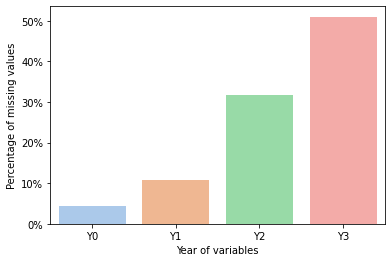

In [32]:
ax = sns.barplot(x=['Y0','Y1','Y2','Y3'], y=np.array([0.04406533446712018,0.10686177248677249,0.31639739229024944,0.5100901967930029])*100, palette='pastel')
plt.xlabel('Year of variables')
plt.ylabel('Percentage of missing values')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [ ]:
28224/12128

2.3271767810026387

In [ ]:
len(data['CUSTOMER_ID'].unique())

12128

In [ ]:
data.sort_values(by='ROW').head(20)

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
4297,2,0,0,2017Q2,0,7,1,581103.459059,612122.516467,589483.648432,608043.506296,618117.885391,572286.965806,595663.823989,598484.795140,592374.298793,600851.987142,618666.358999,611257.492821,614286.305135,595753.583080,614927.198029,575765.908584,617389.802084,607058.381425,615131.005283,578189.877171,573912.625835,577034.556512,628731.489350,588695.367929,602663.994287,619670.487732,601342.126701,599501.380908,580702.155435,605172.141867,612374.075572,602846.687782,603082.268873,...,602238.611294,569635.497383,569690.771511,621675.139715,627054.736006,574223.726878,589579.874664,623133.122345,627140.627628,596661.571732,574520.311390,614847.629204,593966.052639,622541.351417,593577.298515,610679.560390,613220.698155,615628.989908,584080.973259,574790.814329,595747.313056,583814.002802,602846.551695,613914.460251,624184.466138,601705.181254,588731.526063,577631.899885,591900.671899,624579.891601,572312.422496,601762.931580,574251.412954,577170.309608,594024.897459,616177.822587,588163.832676,623659.101547,608794.905517,574860.551018
5842,3,0,0,2016Q1,0,7,1,608189.368162,581513.615779,609292.149994,NaN,600708.646201,613056.508380,603596.954906,NaN,595587.672601,628588.157487,619450.473188,NaN,611199.838933,625510.197950,622849.034549,NaN,594180.345409,616392.204524,596412.193935,NaN,626879.730826,624496.653667,604416.058071,NaN,617638.220218,620132.077922,576559.497665,NaN,610940.878015,591095.980394,576773.300159,NaN,585387.256708,...,NaN,608572.694769,622332.633302,601103.590296,NaN,577540.664228,578281.622188,590465.814274,NaN,609756.956779,588814.018400,586383.373269,NaN,610730.905815,615935.180671,575600.124512,NaN,583923.459740,578784.685601,579529.806442,NaN,608478.996377,616158.426239,608834.668152,NaN,597987.511617,580982.938821,618959.642813,NaN,595610.293959,608263.608776,605605.164605,NaN,581951.016585,608354.236218,623470.119832,591055.821198,592011.405236,572734.002781,NaN
23884,4,0,0,2015Q4,0,7,1,626775.445009,620338.846422,NaN,NaN,600221.302420,581127.642377,NaN,NaN,576546.049381,616987.910843,NaN,NaN,579222.473716,604845.349820,NaN,NaN,603198.743030,571079.607625,NaN,NaN,571915.618982,608530.373185,NaN,NaN,587380.743135,609131.204590,NaN,NaN,599681.312602,585380.900954,NaN,NaN,598712.790779,...,NaN,587802.909999,583903.844377,NaN,NaN,572907.541225,571843.080707,NaN,NaN,593161.129129,582910.070598,NaN,NaN,615017.718711,610852.004788,NaN,NaN,591576.167908,587761.255888,NaN,NaN,589480.260080,605307.325548,NaN,NaN,616662.106818,595190.820363,NaN,NaN,626169.020293,621396.293950,NaN,NaN,590490.362029,620329.261616,NaN,626221.088742,572241.032110,NaN,NaN
15536,5,0,0,2015Q2,0,7,1,613152.446900,595630.881913,NaN,NaN,609049.750940,587819.768006,NaN,NaN,575206.325777,612014.616255,NaN,NaN,581771.232724,616945.663972,NaN,NaN,589031.052366,610867.795934,NaN,NaN,605539.205194,579407.835857,NaN,NaN,571031.185152,580087.801889,NaN,NaN,5

In [ ]:
data[data['EBITDA_Y0'].isnull()]

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
10,413,0,11,2019Q3,123,7,1,NaN,NaN,NaN,NaN,628294.903627,580110.959424,619115.235551,576653.714137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577907.087731,583991.203436,598322.208031,601756.285669,625538.890112,588559.898920,574607.652727,577419.97623,NaN,NaN,NaN,NaN,627442.258013,587842.755216,573094.991868,582903.944943,589938.940547,...,NaN,NaN,NaN,NaN,NaN,NaN,627379.343142,606556.183440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,906,0,13,2014Q4,269,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,20805,0,21,2015Q3,5747,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,29437,0,12,2019Q1,8935,8,1,NaN,NaN,NaN,NaN,609803.729516,NaN,NaN,NaN,602070.023100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619571.210367,NaN,NaN,NaN,577072.903049,NaN,NaN,NaN,614217.457827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601314.820555,NaN,NaN,593385.981204,NaN,NaN,NaN
298,23358,0,24,2015Q3,6561,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,25958,1,5,2016Q3,7474,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602365.223049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602007.123684,NaN,NaN,NaN,586612.293924,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27969,13548,1,5,2018Q1,3815,11,0,NaN,NaN,NaN,NaN,592004.334786,588934.655556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581354.339993,598837.459423,NaN,NaN,NaN,NaN,NaN,NaN,602138.614188,594451.073469,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
temp = data.groupby('CUSTOMER_ID').count()
temp[temp['ROW']==13]

,ROW,Corp_Residence_Country_Code,BR Code,Period,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,TOTALEQUITY_Y1,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2679,13,13,13,13,13,13,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,...,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,13,12,11,9
2946,13,13,13,13,13,13,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,...,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,13,12,9,5
3666,13,13,13,13,13,13,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,...,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,13,12,11,9


In [ ]:
np.sort(data['Period'].unique())

array(['2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
       '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
       '2019Q2', '2019Q3', '2019Q4', '2020Q1'], dtype=object)

In [ ]:
id = 2946
data_cus = data[data['CUSTOMER_ID']==id].sort_values(by=['Period'])
data_cus

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
6887,10629,0,6,2014Q4,2946,8,1,610374.616370,NaN,NaN,NaN,572062.160971,NaN,NaN,NaN,627444.506553,NaN,NaN,NaN,599912.175465,NaN,NaN,NaN,629535.734408,NaN,NaN,NaN,602717.204618,NaN,NaN,NaN,575810.972171,NaN,NaN,NaN,592622.971503,NaN,NaN,NaN,573866.160041,...,NaN,610557.639168,NaN,NaN,NaN,595210.279400,NaN,NaN,NaN,623317.856033,NaN,NaN,NaN,576680.541262,NaN,NaN,NaN,621714.383579,NaN,NaN,NaN,601116.291047,NaN,NaN,NaN,573642.337346,NaN,NaN,NaN,590705.764221,NaN,NaN,NaN,606516.347346,NaN,NaN,626883.633336,NaN,NaN,NaN
16672,10628,0,6,2015Q2,2946,8,1,610981.662196,622031.527097,NaN,NaN,619782.682431,575238.574089,NaN,NaN,627881.490175,605559.887044,NaN,NaN,614922.080441,609513.206371,NaN,NaN,589834.958033,603421.077382,NaN,NaN,622103.108822,584801.623259,NaN,NaN,594629.952330,578928.489861,NaN,NaN,590451.817825,617780.466010,NaN,NaN,602984.159228,...,NaN,580682.014087,618806.116418,NaN,NaN,576688.949057,585287.984394,NaN,NaN,574631.855669,621332.204003,NaN,NaN,620985.550277,570816.486125,NaN,NaN,575352.035406,594403.491002,NaN,NaN,625544.208706,606282.637001,NaN,NaN,578343.063368,616437.745124,NaN,NaN,584064.243374,600172.288911,NaN,NaN,576143.900022,606984.715735,NaN,618033.616208,605021.517385,NaN,NaN
23561,10627,0,6,2015Q3,2946,8,1,594530.034555,582043.922315,NaN,NaN,584611.163598,612315.279417,NaN,NaN,620230.193538,621942.889331,NaN,NaN,631108.281699,592885.990127,NaN,NaN,575693.015409,603772.572181,NaN,NaN,581629.939788,587000.030360,NaN,NaN,581895.962145,621336.754884,NaN,NaN,595026.233409,585308.813757,NaN,NaN,610667.302472,...,NaN,604102.756823,605168.394231,NaN,NaN,584122.319227,604726.022248,NaN,NaN,620551.217370,586636.223940,NaN,NaN,606311.550872,614699.289573,NaN,NaN,577282.214856,578200.239627,NaN,NaN,570964.654263,586298.364274,NaN,NaN,575353.369830,584035.872119,NaN,NaN,604295.189729,593144.250294,NaN,NaN,593559.860280,580604.057138,NaN,574078.980794,608034.072614,NaN,NaN
4165,10626,0,6,2015Q4,2946,8,1,582231.361869,626458.333971,NaN,NaN,611877.446225,595882.484737,NaN,NaN,584711.111942,617758.727911,NaN,NaN,618427.999280,623251.136654,NaN,NaN,623111.564171,590629.910000,NaN,NaN,629062.052246,628601.803726,NaN,NaN,591977.856888,625540.886215,NaN,NaN,593018.922902,582597.253561,NaN,NaN,595439.685809,...,NaN,619048.049137,623135.216322,NaN,NaN,581390.204378,582833.077096,NaN,NaN,629522.473953,630345.217911,NaN,NaN,602964.709107,611411.824080,NaN,NaN,622326.793339,627149.499661,NaN,NaN,571691.739577,592137.858126,NaN,NaN,619362.558412,616538.233859,NaN,NaN,575142.833741,601121.412526,NaN,NaN,593461.564674,595870.171368,NaN,600900.367837,576885.950247,NaN,NaN
14663,10625,0,6,2016Q1,2946,8,1,577523.910207,605158.412650,593033.109024,NaN,623765.023788,627118.476247,575781.835837,NaN,621674.565013,616476.168787,600515.294068,NaN,604248.190489,584196.431272,584464.306565,NaN,604707.079638,571771.007204,627516.214795,NaN,623343.828669,609

In [ ]:
columns = ['CUSTOMER_ID', 'Corp_Residence_Country_Code','BR Code', 'Final_IG', 'B_PLUS_FLAG'] + list(Y0_cols)
data_short = data[columns]
data_short.head()

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,B_PLUS_FLAG,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0
0,1576,1,5,5,1,575863.911214,619611.510181,623105.791017,611355.411490,620745.952718,609095.636450,578103.988392,600890.935743,596259.219747,578045.252633,571736.508285,611986.404942,603141.577521,585871.251511,604601.169985,590472.808115,582917.058057,603769.043190,590316.935078,579949.325730,573565.511062,623675.986993,609912.733618,570091.364648,575870.723892,593269.795473,600112.382878,604537.606945,606861.990009,575350.400174
1,4545,1,5,7,1,599469.364624,608126.531748,627335.355343,604626.757034,596315.871786,577715.935070,616376.771099,584268.408156,599915.942888,575278.320599,586176.759045,599885.309188,612396.980939,608239.368101,576727.633238,623527.400755,625385.094320,599583.772148,584262.286957,622519.607329,585261.894944,584319.594719,600468.027347,593683.929674,599331.009039,612946.959500,576159.542727,603346.339606,NaN,615104.995291
2,648,0,12,8,1,613829.072017,608391.483917,585464.960100,608591.366569,618999.144319,578343.317529,603655.551037,605298.293603,577735.145730,585900.805747,585225.732357,603652.451410,610421.314919,615972.913531,614134.979471,583797.304612,623541.230342,599099.056296,592856.378966,599586.156088,572606.634235,628443.444334,618384.136760,587195.266426,613853.875298,614104.443488,605642.248232,618703.592690,586607.548841,580199.620976
3,13395,0,19,5,1,585059.299344,591791.219692,584513.060799,615999.168162,582358.584899,621919.270235,620046.519867,624582.882164,601679.290137,609409.181664,606435.590692,569227.108284,619543.967706,610683.455442,596054.212034,575626.390128,627037.437178,599367.108922,596121.697084,584225.743532,602652.271667,600047.184269,592635.899148,583240.465017,573787.307640,568608.114496,582067.967917,581638.119480,604725.209898,587097.755174
4,12998,0,19,6,1,605966.227164,582546.955793,590177.329836,607879.645878,624481.204725,581316.994347,594651.641147,619814.409081,604318.176057,599764.180894,600254.713521,599030.420526,587964.127888,587331.672092,579706.987774,592648.180887,574529.317966,609647.879264,603957.579631,627957.167678,599551.537646,570361.838213,602279.589211,592417.646739,599057.069965,607542.555339,601244.861338,571756.113932,NaN,NaN


In [ ]:
data_short.shape

(28224, 35)

In [ ]:
data_short.isnull().sum()

CUSTOMER_ID                       0
Corp_Residence_Country_Code       0
BR Code                           0
Final_IG                          0
B_PLUS_FLAG                       0
EBITDA_Y0                       597
TOTALASSET_Y0                   381
TOTALDEBT_Y0                    875
TOTALREVENUE_Y0                 819
CURRENTASSET_Y0                 789
FIXEDASSET_Y0                   477
CURRENTLIABILITY_Y0             536
NONCURRLIA_Y0                   769
TOTALEQUITY_Y0                  962
TOTALNETWORTH_Y0                825
CAPITALIZATION_Y0               716
TOTINTEXP_Y0                    945
LEASERENTEXP_Y0                 824
EBITDAR_Y0                      600
receivabledays_Y0              1097
INVENTORYDAYS_Y0               4978
payableDAYS_Y0                 1899
Capex2Dep_Y0                   3404
tangibleNetWorth_Y0             729
FIXEDCHARGECOV_Y0               787
DEBTSERVCOV_Y0                  791
NETPROFIT_Y0                    559
NETSALES_Y0                 

In [ ]:
data_short = data_short.dropna(axis=0).reset_index(drop=True)
data_short.shape

(16998, 35)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

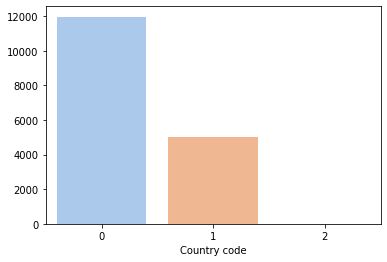

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data_short['Corp_Residence_Country_Code'], palette='pastel')
plt.xlabel('Country code')
plt.ylabel('')

In [ ]:
data_short['Corp_Residence_Country_Code'].value_counts()

0    11975
1     5016
2        7
Name: Corp_Residence_Country_Code, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

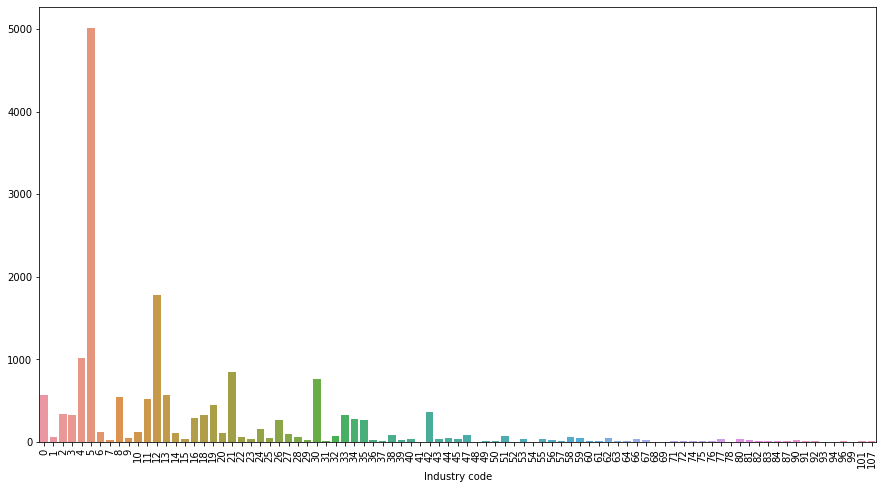

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data_short['BR Code'])
plt.xlabel('Industry code')
plt.xticks(rotation=90)
plt.ylabel('')

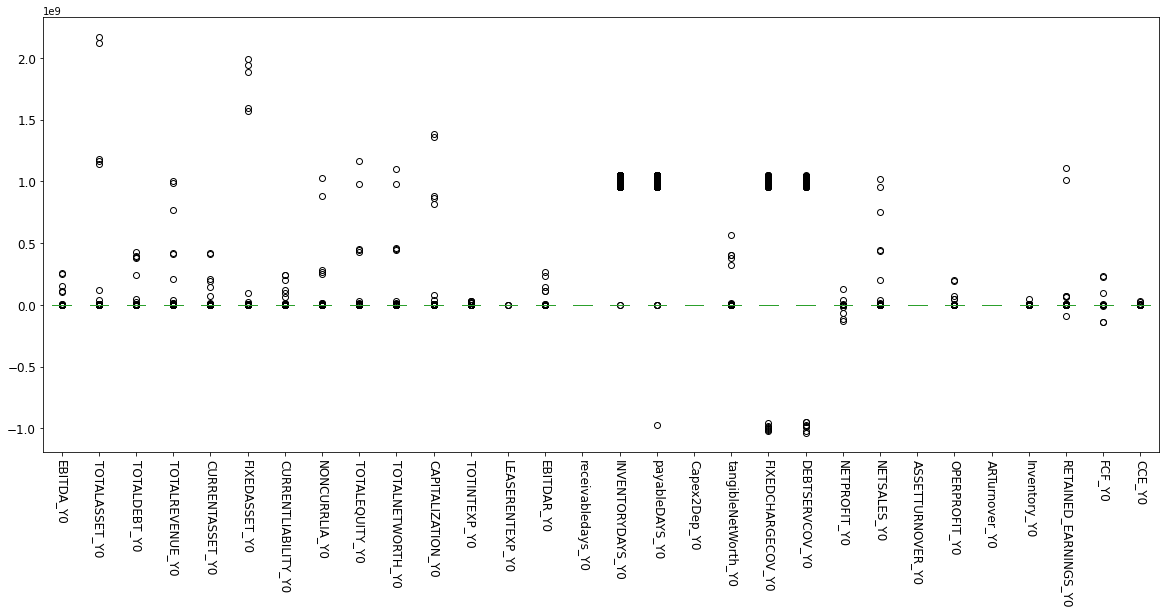

In [ ]:
data_short[Y0_cols].plot(kind='box',figsize=(20,8), rot=-90, fontsize=12)

# Remove outliers

## payableDays_Y0
Remove negative values

In [ ]:
data_short.drop(data_short[data_short['payableDAYS_Y0'] < 0].index, inplace=True)

Remove data > +/- 3SD

In [ ]:
Y0_cols_short = list(Y0_cols)
Y0_cols_short.remove('INVENTORYDAYS_Y0')
Y0_cols_short.remove('payableDAYS_Y0')
Y0_cols_short

['EBITDA_Y0',
 'TOTALASSET_Y0',
 'TOTALDEBT_Y0',
 'TOTALREVENUE_Y0',
 'CURRENTASSET_Y0',
 'FIXEDASSET_Y0',
 'CURRENTLIABILITY_Y0',
 'NONCURRLIA_Y0',
 'TOTALEQUITY_Y0',
 'TOTALNETWORTH_Y0',
 'CAPITALIZATION_Y0',
 'TOTINTEXP_Y0',
 'LEASERENTEXP_Y0',
 'EBITDAR_Y0',
 'receivabledays_Y0',
 'Capex2Dep_Y0',
 'tangibleNetWorth_Y0',
 'FIXEDCHARGECOV_Y0',
 'DEBTSERVCOV_Y0',
 'NETPROFIT_Y0',
 'NETSALES_Y0',
 'ASSETTURNOVER_Y0',
 'OPERPROFIT_Y0',
 'ARTurnover_Y0',
 'Inventory_Y0',
 'RETAINED_EARNINGS_Y0',
 'FCF_Y0',
 'CCE_Y0']

In [ ]:
for col in Y0_cols_short:
  temp_mean = data_short[col].mean()
  temp_std = data_short[col].std()
  low_bound = temp_mean - 3 * temp_std
  high_bound = temp_mean + 3 * temp_std

  data_short = data_short[(data_short[col] > low_bound) & (data_short[col] < high_bound)]

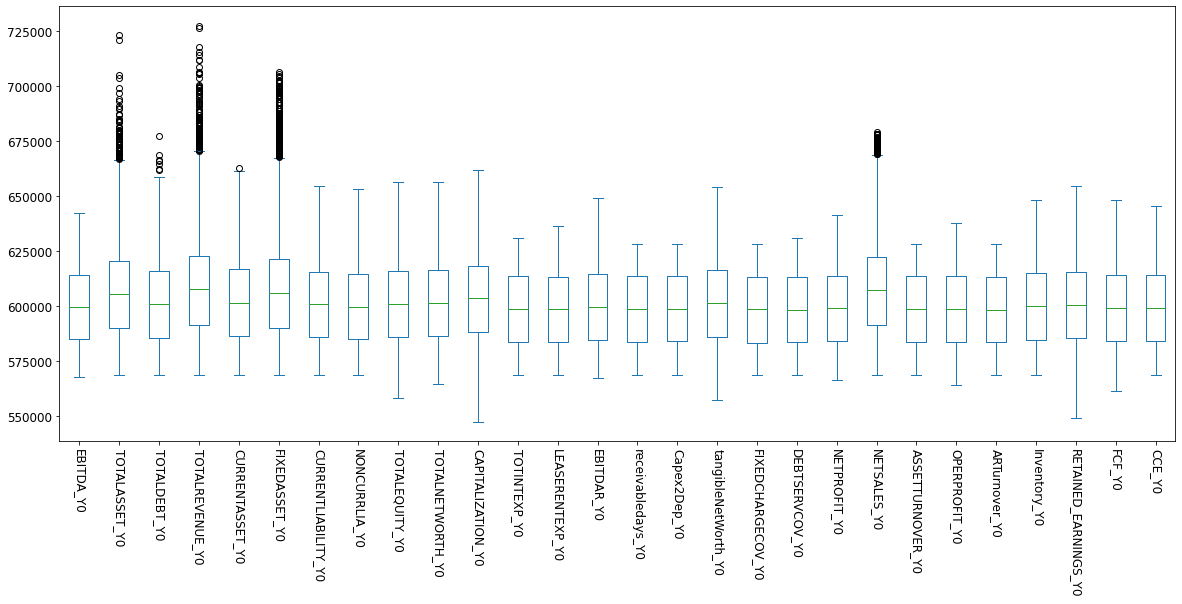

In [ ]:
data_short[Y0_cols_short].plot(kind='box',figsize=(20,8), rot=-90, fontsize=12)

In [ ]:
data_short['Corp_Residence_Country_Code'] = data_short['Corp_Residence_Country_Code'].astype('category')
data_short['BR Code'] = data_short['BR Code'].astype('category')